In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

months = [*range(1, 13)]
sales = [5384, 8081, 10282, 9156, 6118, 9139,
         12460, 10717, 7825, 9693, 15177, 10990]

data = {'months' : [*range(1, 13)],'sales':[5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]}
df = pd.DataFrame(data)

df.dtypes

# plt.plot(months, sales, label="Actual", color="Blue", marker='o')
# plt.legend()
# plt.xlabel('Period')
# plt.ylabel('Sales')
# plt.xticks([i for i in range(1,len(months)+1,1)])
# plt.show()

months    int64
sales     int64
dtype: object

In [2]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'3MMA'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

month13 = (9693+15177+10990)/3
month14 = (15177+10990+month13)/3
month15 = (10990+month13+month14)/3

df2 = pd.DataFrame({"months":[13, 14, 15],
                    "sales":[np.nan, np.nan, np.nan],
                   "3MMA":[month13, month14, month15]})

df = df.append(df2, ignore_index=True)
df.dtypes

months      int64
sales     float64
3MMA      float64
dtype: object

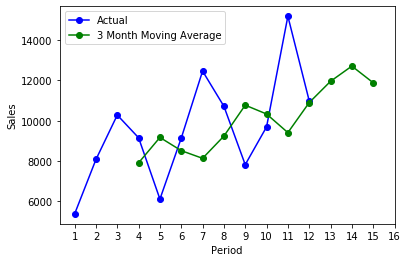

In [3]:
plt.plot(df['months'],df['sales'],label="Actual", color="Blue", marker='o')
plt.plot(df['months'],df['3MMA'],label='3 Month Moving Average', color="Green", marker='o')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.xticks([k for k in range(1,16+1,1)])
plt.legend()

In [18]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i-4],'a=0.8'] = np.round((df.iloc[i-5,2])+ 0.8*((df.iloc[i-5,1])-(df.iloc[i-5,2])),1)
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i-4],'a=0.2'] = np.round((df.iloc[i-5,2])+ 0.2*((df.iloc[i-5,1])-(df.iloc[i-5,2])),1)

df

,months,sales,3MMA,a=0.8,a=0.2
0,1,5384.0,NaN,NaN,NaN
1,2,8081.0,NaN,NaN,NaN
2,3,10282.0,NaN,NaN,NaN
3,4,9156.0,7915.700000,NaN,NaN
4,5,6118.0,9173.000000,8907.9,8163.8
5,6,9139.0,8518.700000,6729.0,8562.0
6,7,12460.0,8137.700000,9014.9,8642.8
7,8,10717.0,9239.000000,11595.5,9002.2
8,9,7825.0,10772.000000,10407.4,10352.3
9,10,9693.0,10334.000000,5780.1,7548.3


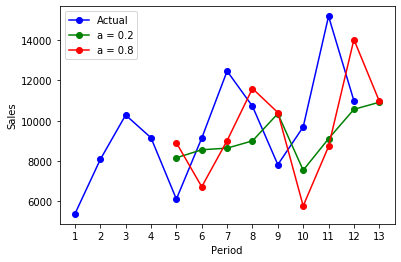

In [19]:
plt.plot(df['months'],df['sales'],label="Actual", color="Blue", marker='o')
plt.plot(df['months'],df['a=0.2'],label='a = 0.2', color="Green", marker='o')
plt.plot(df['months'],df['a=0.8'],label='a = 0.8', color="Red", marker='o')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.xticks([k for k in range(1,13+1,1)])
plt.legend()